# Topics in Artificial Intelligence (CPSC 532L)
# Assignment 1: Intriduction to Deep Learning


This assignment is inspired and adopted from the Deep Learning Lab from Vicente Ordonez's course on Language and Vision at the University of Virginia. The link to the original lab is <a href="http://www.cs.virginia.edu/~vicente/vislang/notebooks/deep_learning_lab.html">here</a>. The first two parts of this notebook are taken nearly verbatim from his lab. Section 1 is provided for you and implements a single-layer supervised neural network; no coding is required for Section 1. Section 2 and Section 3 are the ones where you need to code the solutions and provide answers to questions.

# 1. Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<img src="1_layer_net.png" width="450"/>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## 1.1. Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [10]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.50016214 0.50144221 0.49762719]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.49436147 0.50000265 0.50206961]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.50085591 0.50090561 0.49935961]
 [0.49914543 0.50123507 0.49726004]]


## 1.2. Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [11]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## 1.3. Backward-propagation (Backpropagation)

As we discussed in class, backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [12]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return num_samples * 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


W = [[-0.00155124  0.00900225  0.00641925]
 [ 0.0032293  -0.01863225  0.0202227 ]
 [ 0.02237324  0.00426949  0.00202047]
 [-0.00645578  0.00821045  0.00113795]]
B = [[-0.02291704  0.0047409  -0.00178557]]

x1    = [[1 2 2 3]]
lin   = [[0.00736946 0.009649   0.05253384]]
y_hat = [[0.50184236 0.50241223 0.51313044]]

loss = 0.1963741355960648

dy_hat = [[0.50368471 0.50482446 0.52626088]]
dlin   = [[0.12591947 0.12620318 0.13147449]]
dx1    = [[0.00178475 0.00071395 0.00362169 0.00037289]]

dW = [[0.12591947 0.12620318 0.13147449]
 [0.25183894 0.25240636 0.26294898]
 [0.25183894 0.25240636 0.26294898]
 [0.3777584  0.37860953 0.39442347]]
dB = [[0.12591947 0.12620318 0.13147449]]


## 1.4. Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [13]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -2.91376484  -4.33451325  -5.58664575]
 [ -4.73175487  -7.03895314  -9.0723307 ]
 [-42.8846415  -63.79514376 -82.22396558]
 [ -6.6369088   -9.87305796 -12.72513753]]

approxGradWeight: [[ -2.91366396  -4.33454227  -5.58670406]
 [ -4.73148881  -7.03902964  -9.07248443]
 [-42.86275812 -63.80137059 -82.23652204]
 [ -6.63638532  -9.87320838 -12.72543989]]


## 1.5. Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [14]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [15]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.49900720
epoch[10] = 1.43767626
epoch[20] = 1.42484783
epoch[30] = 1.41999445
epoch[40] = 1.41732966
epoch[50] = 1.41539660
epoch[60] = 1.41392330
epoch[70] = 1.41273246
epoch[80] = 1.41167945
epoch[90] = 1.41091124
epoch[100] = 1.41030429
epoch[110] = 1.40980240
epoch[120] = 1.40937920
epoch[130] = 1.40901870
epoch[140] = 1.40870947
epoch[150] = 1.40844261
epoch[160] = 1.40821092
epoch[170] = 1.40800853
epoch[180] = 1.40783067
epoch[190] = 1.40767344
epoch[200] = 1.40753366
epoch[210] = 1.40740874
epoch[220] = 1.40729654
epoch[230] = 1.40719528
epoch[240] = 1.40710350
epoch[250] = 1.40701995
epoch[260] = 1.40694359
epoch[270] = 1.40687351
epoch[280] = 1.40680893
epoch[290] = 1.40674913
epoch[300] = 1.40669344
epoch[310] = 1.40664117
epoch[320] = 1.40659155
epoch[330] = 1.40654345
epoch[340] = 1.40649493
epoch[350] = 1.40644140
epoch[360] = 1.40636853
epoch[370] = 1.40623689
epoch[380] = 1.40610019
epoch[390] = 1.40602827


# 2. Two-layer neural network with 1-hidden layer.
Section 1 implemented a single layer neural network that takes as input vectors of size 4, and outputs vectors of size 3. Here your task is to modify the code to train a two layer network with one hidden layer of size hidden_state_size (note that this is a parameter and should be something you can change). You will need to handin your code for this and remaining parts of the notebook; the notebook you hand in should also have code executed and result saved.  

<img src="2_layer_net.png" width="650"/>

## 2.1. Implementing the network and SGD learning [20 points].
Please modify the code of Section 1.5 to implement a two-layer network and the SGD training procedure for it. 


In [16]:
hidden_state_size = 5;

# Your code goes here.

# Assuming we don't need to load data again,
# i.e. x and y are defined

# SGD Learning
learningRate = 0.1

model = {}
model['h1_linear'] = nn_Linear(4, hidden_state_size)
model['h1_sigmoid'] = nn_Sigmoid()
model['linear'] = nn_Linear(hidden_state_size, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        h0 = model['h1_linear'].forward(xi)
        h1 = model['h1_sigmoid'].forward(h0)
        a0 = model['linear'].forward(h1)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        dh1 = model['linear'].backward(h1, da0)
        dh0 = model['h1_sigmoid'].backward(h0, dh1)
        model['h1_linear'].backward(xi, dh0)
        
        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
        model['h1_linear'].weight -= learningRate * model['h1_linear'].gradWeight
        model['h1_linear'].bias -= learningRate * model['h1_linear'].gradBias
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.53543535
epoch[10] = 1.47926705
epoch[20] = 1.46193167
epoch[30] = 1.44710536
epoch[40] = 1.44405766
epoch[50] = 1.44300109
epoch[60] = 1.44128031
epoch[70] = 1.42771919
epoch[80] = 1.41458008
epoch[90] = 1.40870923
epoch[100] = 1.40687955
epoch[110] = 1.40590333
epoch[120] = 1.40522375
epoch[130] = 1.40471100
epoch[140] = 1.40431620
epoch[150] = 1.40400454
epoch[160] = 1.40375002
epoch[170] = 1.40353343
epoch[180] = 1.40334172
epoch[190] = 1.40316693
epoch[200] = 1.40300454
epoch[210] = 1.40285177
epoch[220] = 1.40270657
epoch[230] = 1.40256702
epoch[240] = 1.40243130
epoch[250] = 1.40229850
epoch[260] = 1.40216915
epoch[270] = 1.40204332
epoch[280] = 1.40191954
epoch[290] = 1.40179566
epoch[300] = 1.40166957
epoch[310] = 1.40153934
epoch[320] = 1.40140326
epoch[330] = 1.40125992
epoch[340] = 1.40110841
epoch[350] = 1.40094878
epoch[360] = 1.40078243
epoch[370] = 1.40061226
epoch[380] = 1.40044211
epoch[390] = 1.40027559


## 2.2. Gradient checking [10 points].
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section 1.4 above.

In [17]:
# Your code goes here.
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Assuming block above ran, so we still have hidden_state_size

# Define the operations.
h1_linear = nn_Linear(4, hidden_state_size)
h1_sigmoid = nn_Sigmoid()
linear = nn_Linear(hidden_state_size, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
h0 = h1_linear.forward(x)
h1 = h1_sigmoid.forward(h0)
a0 = linear.forward(h1)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dh1 = linear.backward(h1, da0)
dh0 = h1_sigmoid.backward(h0, dh1)
dx  = h1_linear.backward(x, dh0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias
h1_gradWeight = h1_linear.gradWeight
h1_gradBias = h1_linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = loss # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        
        shifted_linear = nn_Linear(hidden_state_size, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
                
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(h1)), y) # Loss function
        
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

        
approxH1GradWeight = np.zeros_like(h1_linear.weight)
approxH1GradBias = np.zeros_like(h1_linear.bias)
# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, h1_linear.weight.shape[0]):
    for j in range(0, h1_linear.weight.shape[1]):
        # Compute f(w)
        fw = loss # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(h1_linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        
        shifted_h1_linear = nn_Linear(4, hidden_state_size)
        shifted_h1_linear.bias = h1_linear.bias
        shifted_h1_linear.weight = shifted_weight
        
        sh0 = shifted_h1_linear.forward(x)
        sh1 = h1_sigmoid.forward(sh0)
        
        fw_epsilon = criterion.forward(sigmoid.forward(linear.forward(sh1)), y) # Loss function
        
        # Compute (f(w + eps) - f(w)) / eps
        approxH1GradWeight[i, j] = (fw_epsilon - fw) / epsilon
        
# These two outputs should be similar up to some precision.
print('Output gradWeight:\n {}'.format(gradWeight))
print('Approx Output GradWeight:\n {}'.format(approxGradWeight))

print('H1 gradWeight:\n {}'.format(h1_gradWeight))
print('Approx H1 GradWeight:\n {}'.format(approxH1GradWeight))



Output gradWeight:
 [[-0.76982928 -1.05587647 -1.36599177]
 [-0.54289007 -0.74461295 -0.96330886]
 [-0.70745994 -0.97033242 -1.25532308]
 [-0.48203681 -0.6611483  -0.8553303 ]
 [-0.51248117 -0.70290495 -0.90935105]]
Approx Output GradWeight:
 [[-0.76982728 -1.05587471 -1.3659892 ]
 [-0.54288908 -0.74461208 -0.96330759]
 [-0.70745825 -0.97033093 -1.2553209 ]
 [-0.48203602 -0.66114761 -0.85532929]
 [-0.51248029 -0.70290417 -0.90934991]]
H1 gradWeight:
 [[ 0.00245456 -0.0213188  -0.02103479 -0.0099551  -0.0159789 ]
 [ 0.00398604 -0.03462027 -0.03415906 -0.0161664  -0.02594864]
 [ 0.03612615 -0.313769   -0.30958891 -0.14651863 -0.2351766 ]
 [ 0.00559095 -0.04855949 -0.04791257 -0.0226755  -0.03639638]]
Approx H1 GradWeight:
 [[ 0.00245452 -0.02131929 -0.02103467 -0.00995543 -0.01597935]
 [ 0.00398594 -0.03462156 -0.03415874 -0.01616728 -0.02594982]
 [ 0.03611762 -0.3138744  -0.309563   -0.14659055 -0.23527389]
 [ 0.00559075 -0.04856202 -0.04791196 -0.02267723 -0.03639871]]


## 2.3. Activation functions [10 points].

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [18]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        return np.maximum(np.zeros(x.shape), x)
    
    def backward(self, x, gradOutput):
        xcopy = np.copy(x)
        xcopy[xcopy <= 0] = 0
        xcopy[xcopy > 0] = 1
        return np.multiply(xcopy, gradOutput)
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        return np.divide(np.sinh(x), np.cosh(x))
    
    def backward(self, x, gradOutput):
        return np.multiply(np.divide(1, np.square(np.cosh(x))), gradOutput)
    

## 2.4. Loss functions [10 points].

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [19]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        num_samples = labels.shape[0]
        return (1/num_samples) * np.sum(
            np.multiply(labels, np.log(predictions)) + 
            np.multiply((1-labels), np.log(1 - predictions)))
        
    def backward(self, predictions, labels):
        # Backward pass.
        return np.divide(labels, predictions) - np.divide((1-labels), (1-predictions))
        

<b>Optional 1</b> [15 points]: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each input in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch).</span>

# 3. Behaviour of neural networks [10 points].

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

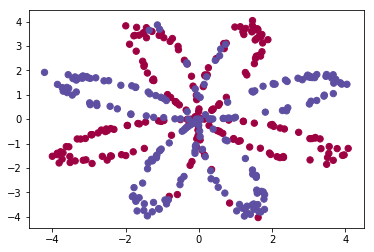

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 3.1 Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section 2.1 here, train it and then display the results. 

epoch[0] = 0.09728146
epoch[10] = 0.09935662
epoch[20] = 0.09936244
epoch[30] = 0.09934754
epoch[40] = 0.09926602
epoch[50] = 0.09892327
epoch[60] = 0.09817315
epoch[70] = 0.09724175
epoch[80] = 0.09589014
epoch[90] = 0.09443383
epoch[100] = 0.09332809
epoch[110] = 0.09259587
epoch[120] = 0.09211205
epoch[130] = 0.09177365
epoch[140] = 0.09152052
epoch[150] = 0.09132029
epoch[160] = 0.09115538
epoch[170] = 0.09101571
epoch[180] = 0.09089506
epoch[190] = 0.09078929
epoch[200] = 0.09069550
epoch[210] = 0.09061153
epoch[220] = 0.09053575
epoch[230] = 0.09046687
epoch[240] = 0.09040387
epoch[250] = 0.09034592
epoch[260] = 0.09029236
epoch[270] = 0.09024262
epoch[280] = 0.09019624
epoch[290] = 0.09015284


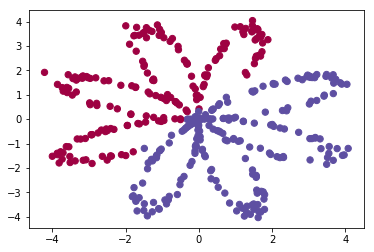

In [21]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 

# Define the 2-layer network here (fill in yout code)
model = {}
model['h1_linear'] = nn_Linear(2, hidden_state_size)
model['h1_sigmoid'] = nn_Sigmoid()
model['linear'] = nn_Linear(hidden_state_size, 1)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        xi = X.T[i:i+1, :]
        yi = Y.T[i:i+1, :]
        
        # Forward pass (fill in your code)
        h0 = model['h1_linear'].forward(xi)
        h1 = model['h1_sigmoid'].forward(h0)
        a0 = model['linear'].forward(h1)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)
       
        # Backward pass (fill in your code)
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        dh1 = model['linear'].backward(h1, da0)
        dh0 = model['h1_sigmoid'].backward(h0, dh1)
        model['h1_linear'].backward(xi, dh0)
        
        # Update gradients (fill in your code)
        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
        model['h1_linear'].weight -= learningRate * model['h1_linear'].gradWeight
        model['h1_linear'].bias -= learningRate * model['h1_linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))
        
        
%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi = X.T[i:i+1, :]
    h0 = model['h1_linear'].forward(xi)
    h1 = model['h1_sigmoid'].forward(h0)
    a0 = model['linear'].forward(h1)
    y_hat = model['sigmoid'].forward(a0)
        
    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 3.2 Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09241678
epoch[10] = 0.09781934
epoch[20] = 0.09767770
epoch[30] = 0.09701358
epoch[40] = 0.09573943
epoch[50] = 0.09489850
epoch[60] = 0.09418834
epoch[70] = 0.09302600
epoch[80] = 0.09118375
epoch[90] = 0.08916377
epoch[100] = 0.08757663
epoch[110] = 0.08648782
epoch[120] = 0.08575350
epoch[130] = 0.08519125
epoch[140] = 0.08453253
epoch[150] = 0.08319880
epoch[160] = 0.08016500
epoch[170] = 0.07492183
epoch[180] = 0.06883248
epoch[190] = 0.06351317
epoch[200] = 0.05939159
epoch[210] = 0.05629560
epoch[220] = 0.05395882
epoch[230] = 0.05216327
epoch[240] = 0.05075314
epoch[250] = 0.04962105
epoch[260] = 0.04869321
epoch[270] = 0.04791847
epoch[280] = 0.04726082
epoch[290] = 0.04669443


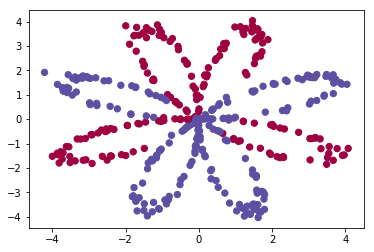

In [22]:
hidden_state_size = 5; 


# Define the 2-layer network here (fill in yout code)
model = {}
model['h1_linear'] = nn_Linear(2, hidden_state_size)
model['h1_sigmoid'] = nn_Sigmoid()
model['linear'] = nn_Linear(hidden_state_size, 1)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        xi = X.T[i:i+1, :]
        yi = Y.T[i:i+1, :]
        
        # Forward pass (fill in your code)
        h0 = model['h1_linear'].forward(xi)
        h1 = model['h1_sigmoid'].forward(h0)
        a0 = model['linear'].forward(h1)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)
       
        # Backward pass (fill in your code)
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        dh1 = model['linear'].backward(h1, da0)
        dh0 = model['h1_sigmoid'].backward(h0, dh1)
        model['h1_linear'].backward(xi, dh0)
        
        # Update gradients (fill in your code)
        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
        model['h1_linear'].weight -= learningRate * model['h1_linear'].gradWeight
        model['h1_linear'].bias -= learningRate * model['h1_linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))
        
        
%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi = X.T[i:i+1, :]
    h0 = model['h1_linear'].forward(xi)
    h1 = model['h1_sigmoid'].forward(h0)
    a0 = model['linear'].forward(h1)
    y_hat = model['sigmoid'].forward(a0)
        
    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## Answer to Q3.2

<b>Describe what is different between the two runs </b>. What behaviour did network with larger hidden state exhibit that the one with smaller one did not? Why? 

* One immediate observation is that the run with 1 hidden unit does not predict as well as one with 5 hidden units.  This is expected because the second model has greater representational power (of different functions) than the first model.
* Second observation is that the first model quickly converges to a loss of around 0.09.  On the other hand, for the second model, it was observed that the loss is still decreasing at the end of 300 epochs.  This is also expected because in general the time required to train a model is proportional to its complexity.
* Though it is not really noticeable for network of this size, it is still clear that the second model required more time in each epoch. 

<div style="font-size:0.8em;color:#888;text-align:center;padding-top:20px;">If you find any errors or have questions about the assignment please contact instructor at lsigal@cs.ubc.ca or post the question on Piazza. 